In [1]:
%matplotlib inline
import numpy as np
import pylab
import pytry
import pandas
import seaborn
from nengo_bee import NengoBee

c:\users\terry\py35\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
data = pytry.read('gather1')

In [3]:
bee = NengoBee()

all_x = np.vstack([d['x'][:-1] for d in data])
all_x_body = bee.bee.world_state_to_body_state(all_x)
all_u = np.vstack([d['u'][:-1] for d in data])
all_du = np.vstack([np.diff(d['u'], axis=0) for d in data])/0.001

mean_x = np.mean(all_x, axis=0)
mean_x_body = np.mean(all_x_body, axis=0)
mean_u = np.mean(all_u, axis=0)
mean_du = np.mean(all_du, axis=0)
std_x = np.std(all_x, axis=0)
std_x_body = np.std(all_x_body, axis=0)
std_u = np.std(all_u, axis=0)
std_du = np.std(all_du, axis=0)

In [4]:
x_names = [
    '$\phi_r$',
    '$\psi_r$',
    '$\dot{\phi}_r$',
    '$\dot{\psi}_r$',
    '$\phi_l$',
    '$\psi_l$',
    '$\dot{\phi}_l$',
    '$\dot{\psi}_l$',
    '$\phi$',
    '$\\theta$',
    '$\psi$',
    '$x$',
    '$y$',
    '$z$',
    '$\dot{\phi}$',
    '$\dot{\\theta}$',
    '$\dot{\psi}$',
    '$\dot{x}$',
    '$\dot{y}$',
    '$\dot{z}$',
]

u_names = [
    'stroke ampl.', 'pitch torque', 'yaw torque', 'roll'
]

c:\users\terry\py35\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


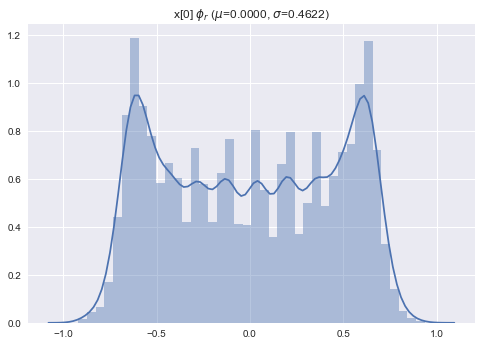

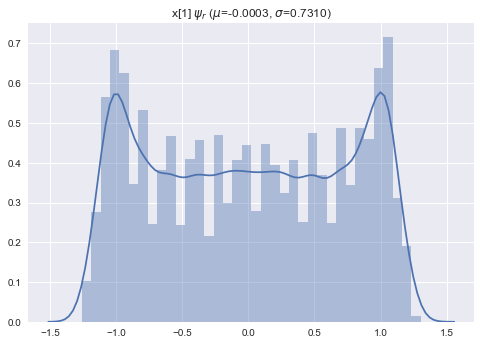

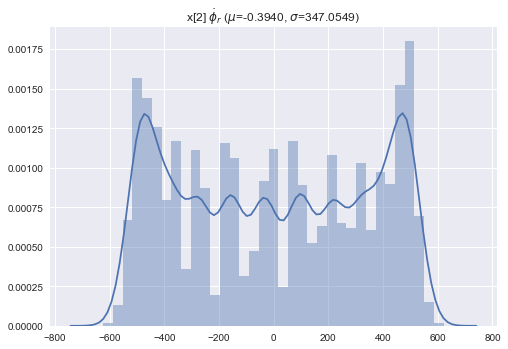

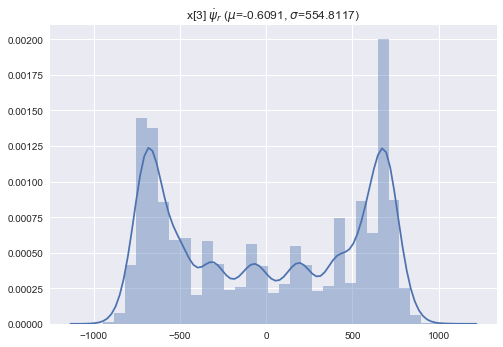

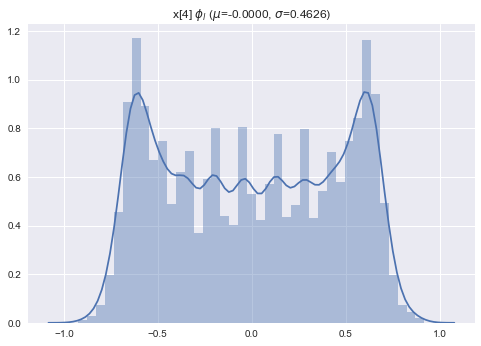

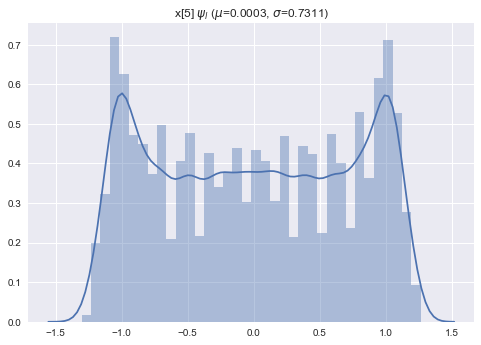

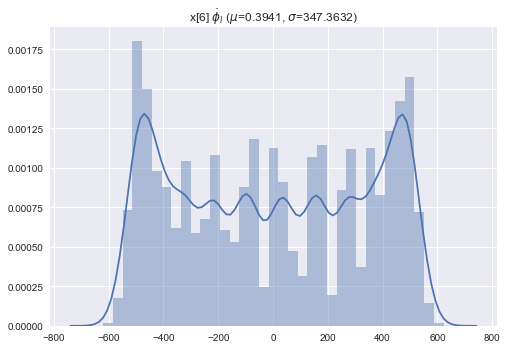

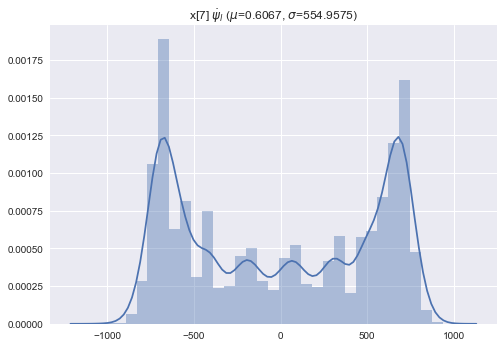

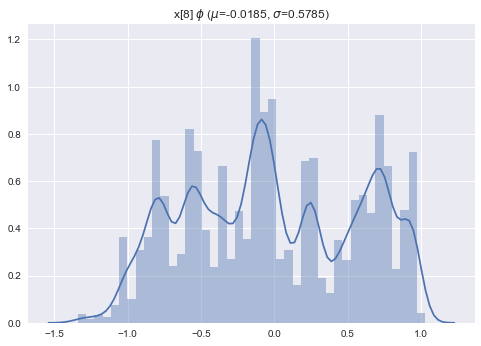

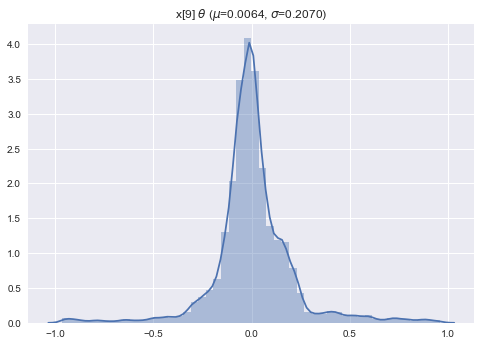

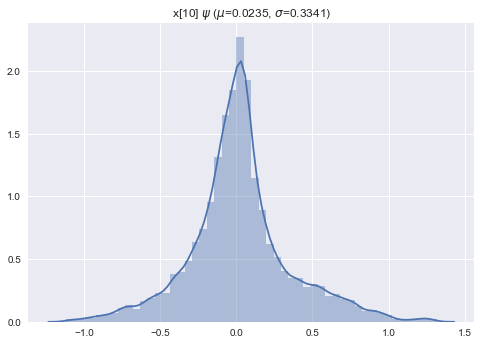

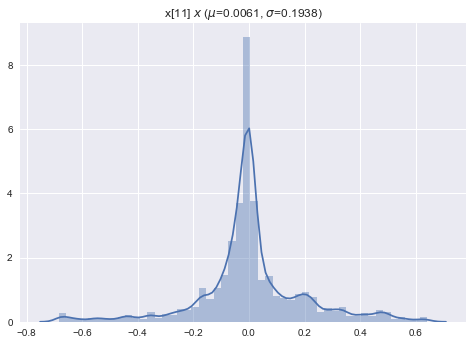

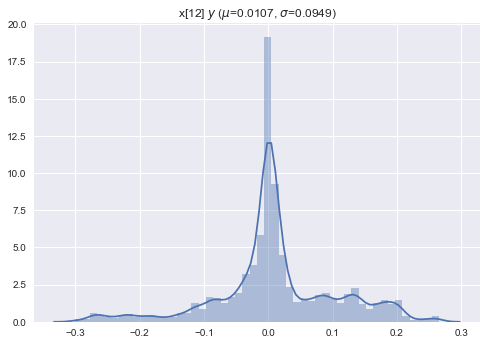

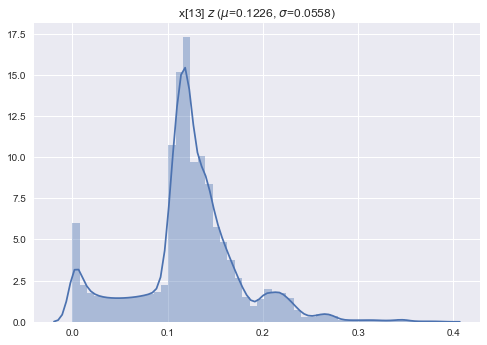

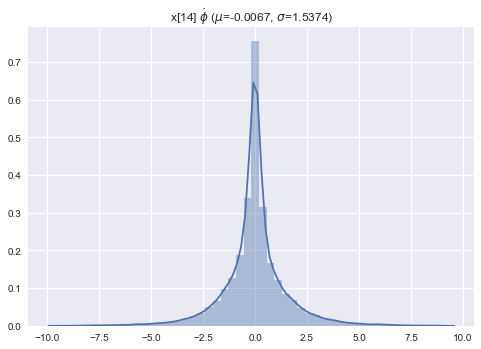

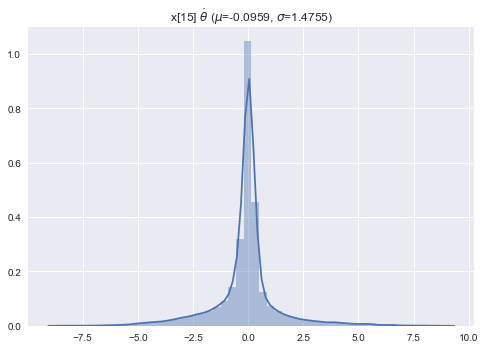

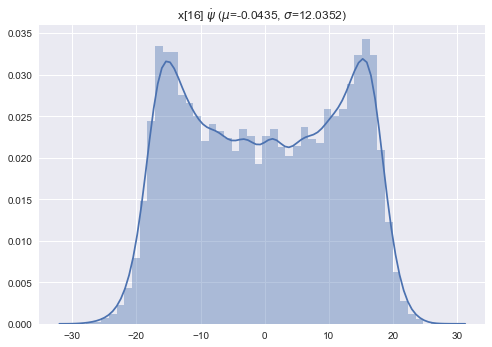

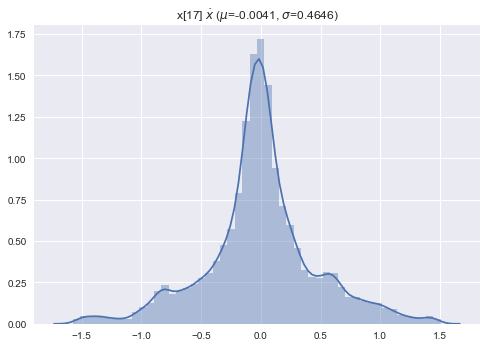

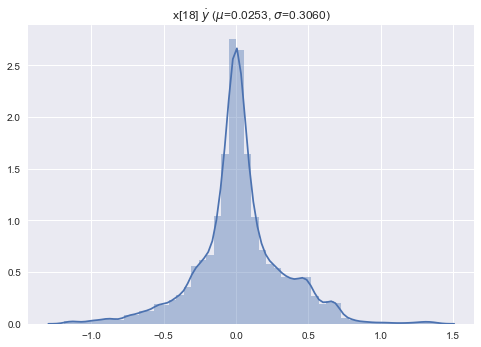

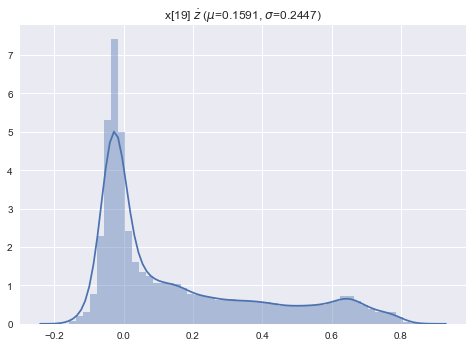

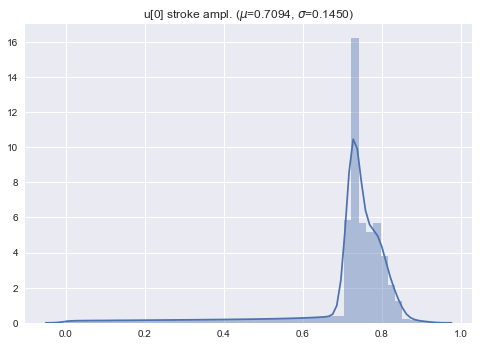

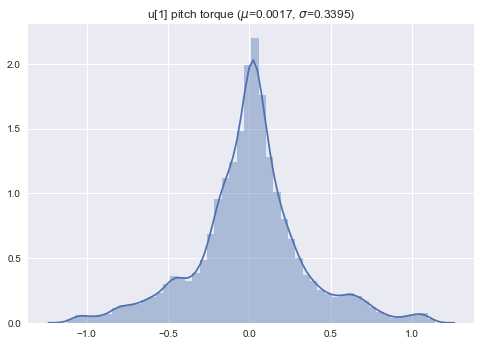

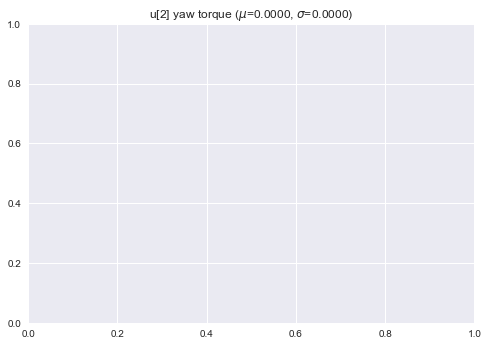

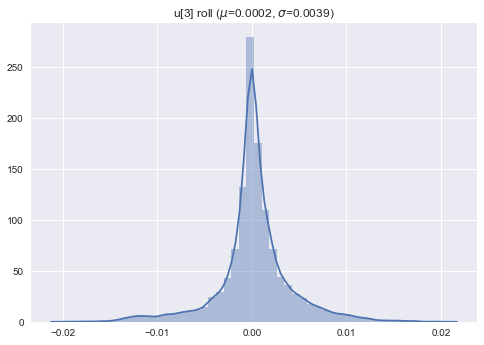

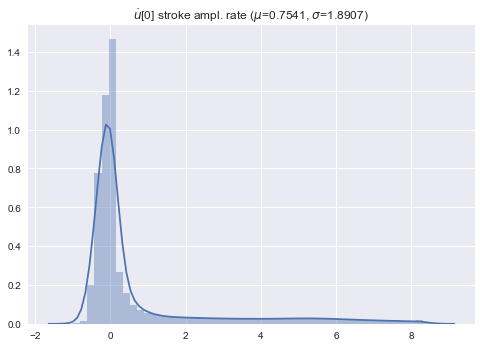

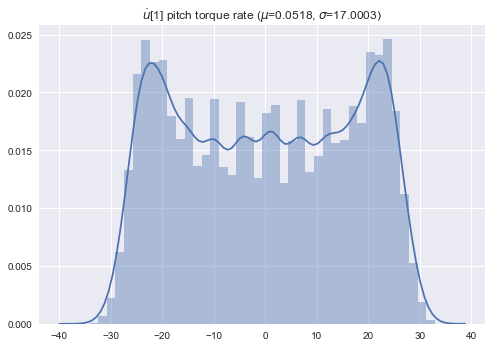

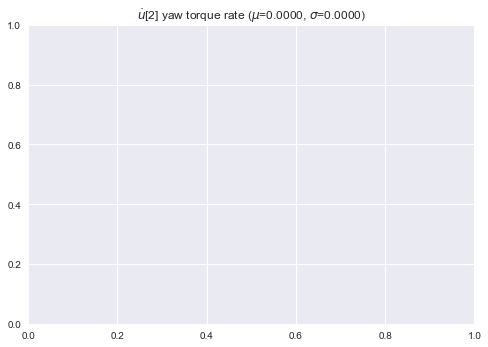

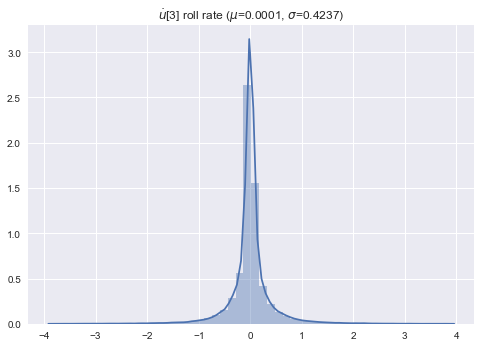

In [6]:
for i in range(20):
    pylab.figure()
    seaborn.distplot(all_x[:,i])
    pylab.title('x[%d] %s ($\mu$=%1.4f, $\sigma$=%1.4f)' % (i, x_names[i], mean_x[i], std_x[i]))
    
for i in range(4):
    pylab.figure()
    if std_u[i] > 0:
        seaborn.distplot(all_u[:,i])
    pylab.title('u[%d] %s ($\mu$=%1.4f, $\sigma$=%1.4f)' % (i, u_names[i], mean_u[i], std_u[i]))
    
for i in range(4):
    pylab.figure()
    if std_u[i] > 0:
        seaborn.distplot(all_du[:,i])
    pylab.title('$\dot{u}$[%d] %s rate ($\mu$=%1.4f, $\sigma$=%1.4f)' % (i, u_names[i], mean_du[i], std_du[i]))

In [5]:
norm_x = (all_x - mean_x) / std_x
norm_x_body = (all_x_body - mean_x_body) / std_x_body
norm_u = (all_u - mean_u) / std_u
norm_du = (all_du - mean_du) / std_du

c:\users\terry\py35\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
c:\users\terry\py35\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
keep_x = [15,16,19]
keep_u = []#0,1,3]

x_vals = norm_x[:,keep_x]
u_vals = norm_u[:,keep_u]

du_vals = norm_du[:,[0,1,3]]
pts = np.hstack([x_vals, u_vals])

In [29]:
import nengo
model = nengo.Network()
with model:
    D = pts.shape[1]
    ens = nengo.Ensemble(n_neurons=500, dimensions=D, neuron_type=nengo.LIFRate(), radius=np.sqrt(D))
    du = nengo.Node(None, size_in=3)
    
    c = nengo.Connection(ens, du, eval_points=pts, scale_eval_points=False, function=du_vals)

In [30]:
sim = nengo.Simulator(model)

Building finished in 0:00:02.                                                                                                                                   


In [31]:
sim.data[c].solver_info

{'rmses': array([ 0.79122008,  0.25340432,  0.70967476]),
 'time': 0.14583897590637207}

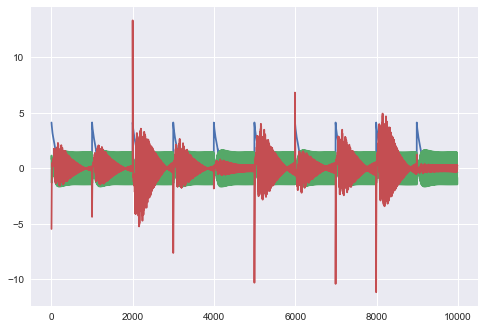

In [132]:
pylab.plot(fn)

In [133]:
np.savez('gather7-hover', 
         mean_x=mean_x,
         mean_x_body=mean_x_body,
         mean_u=mean_u, 
         std_x=std_x,
         std_x_body=std_x_body,
         std_u=std_u,
         mean_du=mean_du,
         std_du=std_du, 
         all_du=all_du)